### Import Libraries

In [25]:
import pandas as pd 
import numpy as np
import re
import os
import warnings
warnings.filterwarnings('ignore')

Pandas is an open-source Python library providing high-performance data manipulation and analyst tool using its powerful data stucture

In [26]:
imdbPath= '../imdb-dataset-of-50k-movie-reviews/'

In [27]:
data = pd.read_csv(imdbPath+'IMDBDataset.csv')

In [28]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [29]:
# Basic preprocessing steps

def preprocessing(sentence):
    sentence = replace_links(sentence)                          #Remove URLs
    sentence = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in sentence.split(" ")])    
    sentence = remove_tags(sentence)                            #Remove tags
    sentence = re.sub('[^a-zA-Z]',' ',sentence)                 #Remove punctuations and numbers
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)         #Remove single characters
    sentence = re.sub(r'\s+', ' ', sentence)                    #Remove multiple whitespaces
    return sentence

def replace_links(sentence, filler=' '):
    sentence = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',
                      filler, sentence).strip()
    return sentence
def remove_number(sentence):
    sentence = ''.join([i for i in sentence if not i.isdigit(abs)])
    return sentence

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(sentence):
    return TAG_RE.sub('', sentence)


In [30]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [31]:
X = []
sentences = list(data['review'])
for sentence in sentences:
    X.append(preprocessing(sentence))

In [32]:
y = data['sentiment'].values

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y, test_size=0.02, random_state=43)

### Representing text data as Bag of Words:

We want to count the word occurrences as a Bag of Words which include the below steps in the diagram —
Bag of words processing<br/>

<img src = "1*TmGtC3uYZboHh8GIG4N5tA.png"  width=600 height=350 >
<br/>

In order to represent the input dataset as Bag of words, we will use CountVectorizer and call it’s transform method. CountVectorizer is a transformer that converts the input documents into sparse matrix of features.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5, ngram_range=(1, 2))
Xtrain = vect.fit(Xtrain).transform(Xtrain)
Xtest = vect.transform(Xtest)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 259953
Number of features: 259953


<strong>CountVectorizer </strong>is used with two parameters —<br/>
<strong>min_df ( = 5)</strong>: defines the minimum frequency of a word for it to be counted as a feature<br/>
<strong>ngram_range (= (1,2))</strong>: The ngram_range parameter is a tuple. It defines the minimum and maximum length of sequence of tokens considered. In this case, this minimum length is 1 and maximum length is 2. So, this will find sequence of 1 and 2 tokens like — ‘but the’, ‘wise ’ etc.

In [36]:
ytest = ytest.reshape(ytest.shape[0],1)
ytrain = ytrain.reshape(ytrain.shape[0],1)

### Model development:
<br/>
We will use <strong>LogisticRegression</strong> for model development as for high dimensional sparse data like ours, <strong>LogisticRegression</strong>  often works best.

In [37]:
import sklearn
model = sklearn.linear_model.LogisticRegression(penalty='l1', C=0.1)
history= model.fit(Xtrain,ytrain)

In [38]:
model.predict(Xtest)
print('Score: {:.2f}'.format(model.score(Xtest,ytest)))

Score: 0.90


While developing model, we need to do two other things —
<br/>
<strong>Grid Search:</strong> For paramater tuning of LogisticRegression. We want to determine what value of coefficeint ‘C’ provides better accuracy.<br/>
<strong>Cross validation: </strong>In order to avoid overfitting of data.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(Xtrain, ytrain)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.91
Best parameters:  {'C': 0.1}
Best estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Here, we use 5-fold cross validation with <strong>GridSearchCV</strong>. After fitting train data we see the best_score_, best_params_ for ‘C’, and the best_estimator_ 

In [40]:
lr = grid.best_estimator_
lr.fit(Xtrain,ytrain)
# lr.predict(Xtest)
print('Score: {:.2f}'.format(lr.score(Xtest,ytest)))

Score: 0.91


In [41]:
feature_val = grid.best_estimator_.coef_.copy()
top =[[],[]]
for i in range(25):
    top[0].append(feature_val[0][feature_val.argmax()])
    top[1].append(feature_names[feature_val.argmax()])
    feature_val[0][feature_val.argmax()] = -5


In [42]:
feature_val = grid.best_estimator_.coef_.copy()
bottom =[[],[]]
for i in range(25):
    bottom[0].append(feature_val[0][feature_val.argmin()])
    bottom[1].append(feature_names[feature_val.argmin()])
    feature_val[0][feature_val.argmin()] = 5
bottom[0].reverse()
bottom[1].reverse()

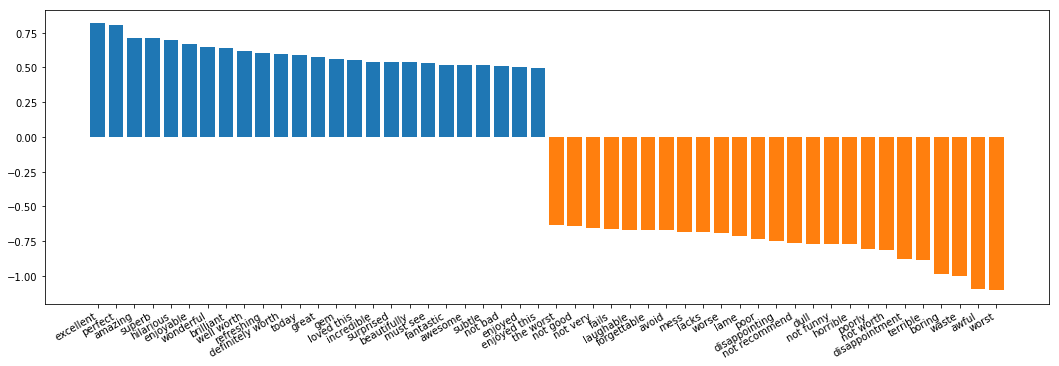

In [43]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(18,6))

ax.bar(top[1],top[0])
ax.bar(bottom[1],bottom[0])
fig.autofmt_xdate()
plt.show()